## Purpose:

To plot the NLCD Land Cover data against WNV Incidence Rates for 1999-2015

### Imports

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import numpy as np

#### Load WNV Incidence Data

In [25]:
wnv = pd.read_csv('../data/wnv/WNV_NI_NNI_1999to2015_prevalence_incidence_final_20180530_urban_counties.csv')
wnv = wnv.set_index('GEOID10', drop=True)
incidence = wnv.filter(like='NI_IR_', axis='columns')
incidence

,NI_IR_1999,NI_IR_2000,NI_IR_2001,NI_IR_2002,NI_IR_2003,NI_IR_2004,NI_IR_2005,NI_IR_2006,NI_IR_2007,NI_IR_2008,NI_IR_2009,NI_IR_2010,NI_IR_2011,NI_IR_2012,NI_IR_2013,NI_IR_2014,NI_IR_2015
GEOID10,,,,,,,,,,,,,,,,,
31109,0.0,0.0,0.0,3.482999,10.659885,0.377235,1.487719,0.734522,0.362303,0.357647,0.0,0.349478,0.000000,1.702962,3.025322,0.993059,1.308451
46099,0.0,0.0,0.0,0.000000,9.756732,1.284951,1.901406,3.112744,0.611333,0.000000,0.0,0.000000,0.000000,3.988740,0.557367,1.643331,0.000000
39003,0.0,0.0,0.0,2.764518,0.000000,0.000000,0.000000,1.874133,0.000000,0.000000,0.0,0.941575,0.000000,4.748564,0.000000,0.000000,0.000000
42007,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.592038
37037,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42129,0.0,0.0,0.0,0.271976,0.543721,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
12015,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
44003,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


#### Load NLCD Land Cover Data

In [66]:
nlcd = pd.read_csv('../data/nlcd/urban_county_data/csv_files/NLCD_Urban_Counties_keyed_percentage.csv')
nlcd = nlcd.drop(columns='NAME').set_index('GEOID', drop=True)
nlcd

,open_water,developed_open,developed_low,developed_medium,developed_high,barren_land,deciduous_forest,evergreen_forest,mixed_forest,shrub,grassland,pasture_hay,cultivated_crops,woody_wetlands,emergent_herbaceous_wetlands,0,perennial_ice
GEOID,,,,,,,,,,,,,,,,,
31109,1.395831,4.166243,5.334407,2.797474,1.263109,0.041138,4.722605,0.013349,0.120372,0.039776,22.022763,1.978438,55.359199,0.303495,0.441802,0.000000,0.0
46099,1.399786,5.728654,2.579947,1.880054,0.834276,0.204372,1.264094,0.000587,0.064890,0.002572,2.862341,11.595887,69.659931,0.053564,1.869044,0.000000,0.0
39003,1.034520,8.543177,5.767386,1.903124,1.162453,0.047999,7.984013,0.063400,0.072848,0.009826,0.703538,3.120379,69.049808,0.289220,0.248308,0.000000,0.0
42007,1.959637,10.805826,5.974857,2.910161,1.628293,0.221965,52.025637,0.206798,6.950775,0.321204,0.736446,13.076093,2.732485,0.347205,0.102619,0.000000,0.0
37037,4.110420,5.707830,1.204387,0.400514,0.123226,0.122413,26.611143,19.070543,17.985143,2.508423,4.036554,15.478753,1.273433,1.277266,0.089952,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42129,0.896810,7.534171,6.193065,2.880380,0.832672,0.328385,44.253081,0.209373,16.093242,0.276088,0.755572,11.347446,8.212756,0.145833,0.041127,0.000000,0.0
12015,18.839648,9.236499,5.749068,1.896039,0.406985,0.174490,0.217455,1.897564,0.899901,3.870751,0.525521,14.614868,3.238055,27.501771,10.929072,0.002314,0.0
44003,9.588837,7.279420,8.705670,11.316464,3.496783,0.737014,20.970011,7.565275,18.264873,0.377175,0.984566,1.134549,0.125187,9.038899,0.415276,0.000000,0.0


#### Sum some related land coverages

In [67]:
nlcd_add = nlcd.copy()
nlcd_add['developed'] = nlcd['developed_open'] + nlcd['developed_low'] + nlcd['developed_medium'] + nlcd['developed_high']
nlcd_add['forest'] = nlcd['deciduous_forest'] + nlcd['evergreen_forest'] + nlcd['mixed_forest']
nlcd_add['farmland'] = nlcd['cultivated_crops'] + nlcd['pasture_hay']

#### Find the most common land cover for each county

In [68]:
def common_land_cover(row):
    row['largest'] = row.idxmax()
    return row

In [69]:
nlcd = nlcd.apply(common_land_cover, axis='columns')
nlcd_add = nlcd_add.apply(common_land_cover, axis='columns')

### Number of most common land cover types
#### NLCD Original Fields

In [90]:
nlcd['largest'].value_counts()

deciduous_forest                222
cultivated_crops                182
evergreen_forest                 88
open_water                       81
pasture_hay                      67
shrub                            52
woody_wetlands                   42
grassland                        38
developed_low                    29
developed_open                   19
mixed_forest                     13
developed_medium                  8
emergent_herbaceous_wetlands      6
developed_high                    4
barren_land                       1
Name: largest, dtype: int64

#### NLCD + Additional Fields

In [91]:
nlcd_add['largest'].value_counts()

forest                          327
farmland                        242
developed                       109
open_water                       65
shrub                            44
grassland                        31
woody_wetlands                   29
emergent_herbaceous_wetlands      4
barren_land                       1
Name: largest, dtype: int64

In [94]:
nlcd_add['developed_open']

GEOID
31109     4.166243
46099     5.728654
39003     8.543177
42007    10.805826
37037     5.707830
           ...    
42129     7.534171
12015     9.236499
44003     7.279420
28089     5.322624
54099     3.605449
Name: developed_open, Length: 852, dtype: float64

### Plots of Mean WNV IR vs Land Cover Type

We plot the land cover types against mean WNV IR, excluding years where the incidence rate was zero

In [151]:
nonzero_incidence = incidence.copy()
nonzero_incidence[nonzero_incidence==0] = np.nan
mean_incidence = nonzero_incidence.mean(axis=1)

def plot_land_cover(land_cover):
    fig, ax = plt.subplots(1,1,figsize=(16,8))
    nlcd_add[land_cover]
    ax.scatter(nlcd_add[land_cover], mean_incidence)
    
    ax.set_xlabel(land_cover + ' (%)')
    ax.set_ylabel('Mean WNV Incidence Rate 1999-2014')
    plt.show()

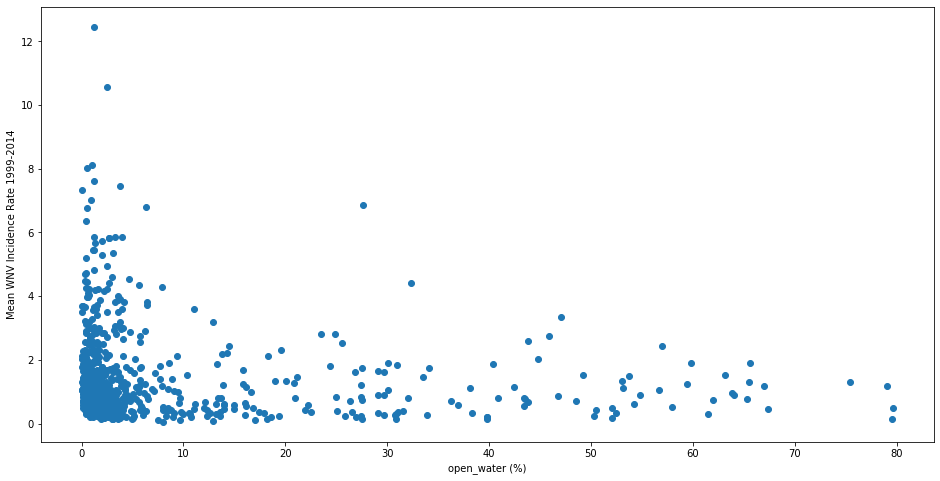

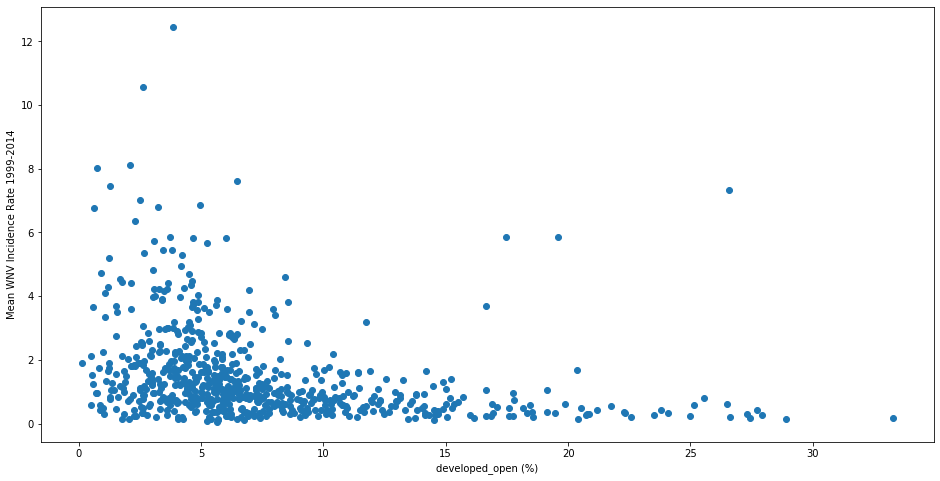

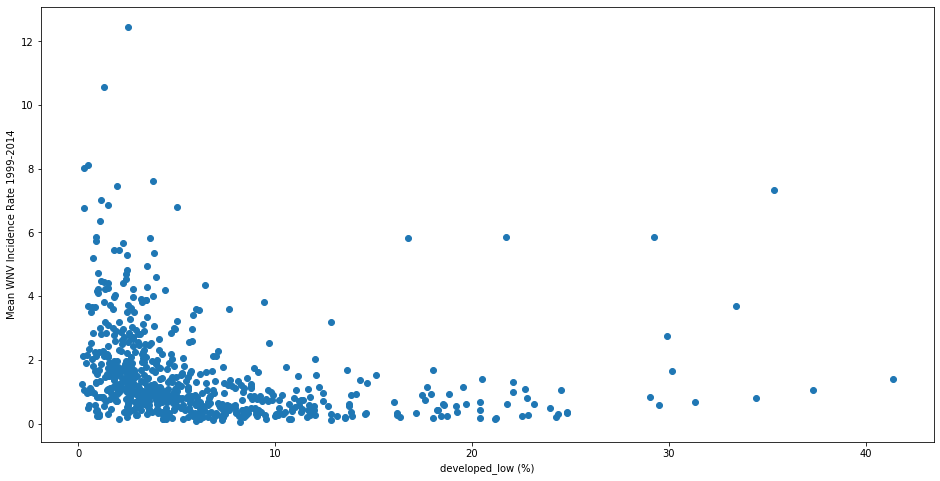

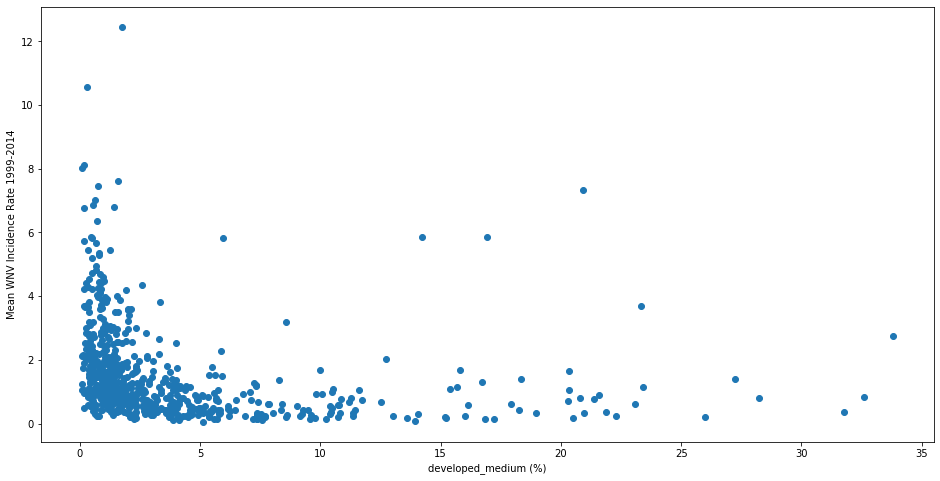

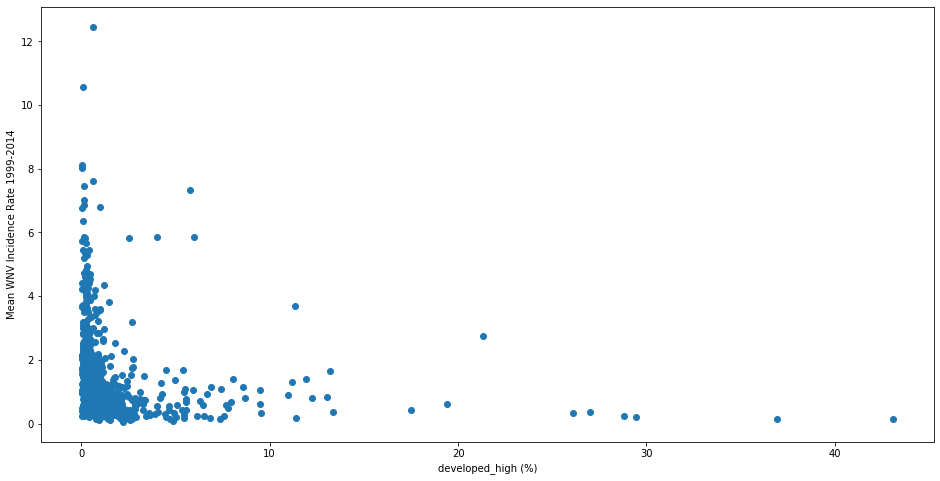

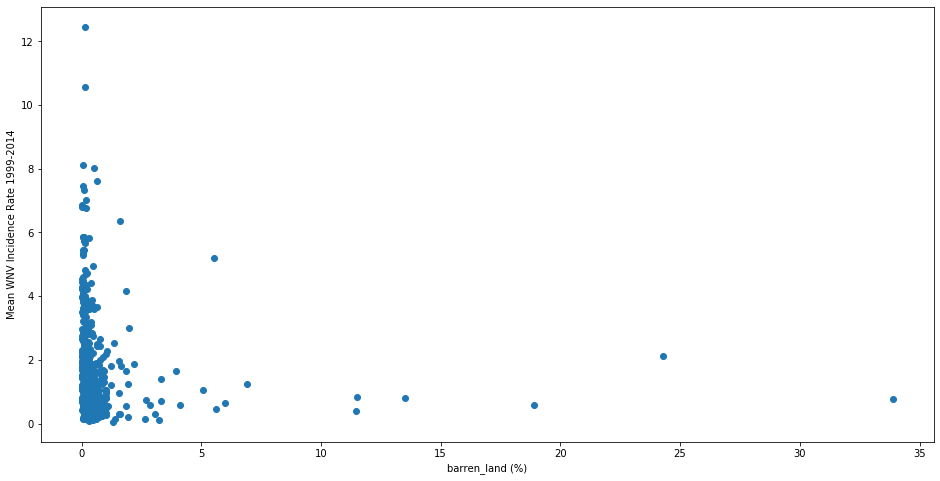

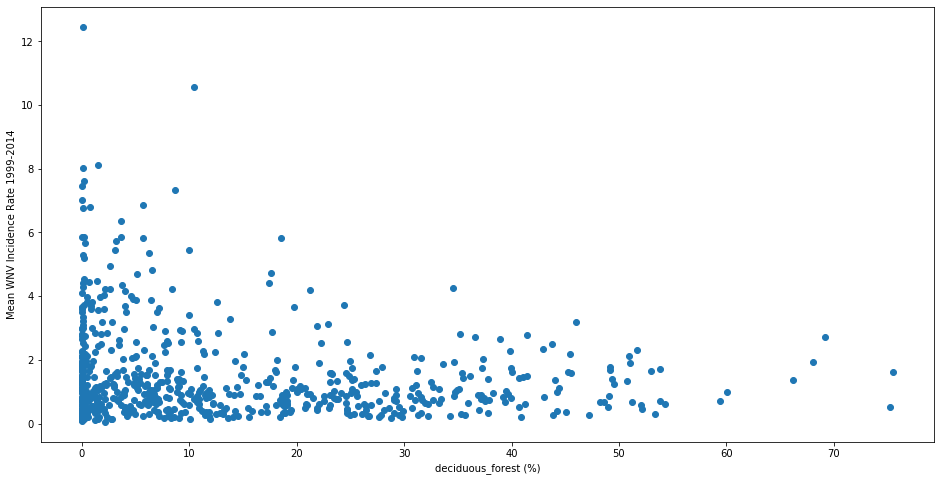

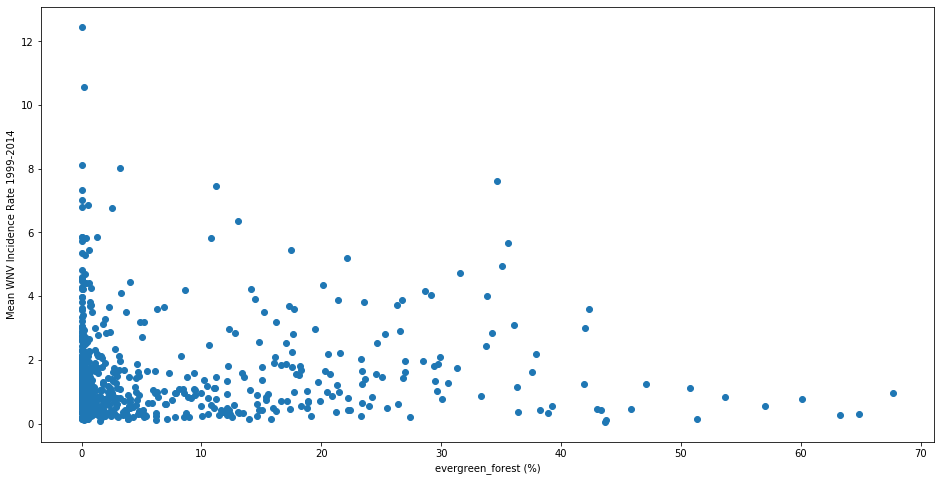

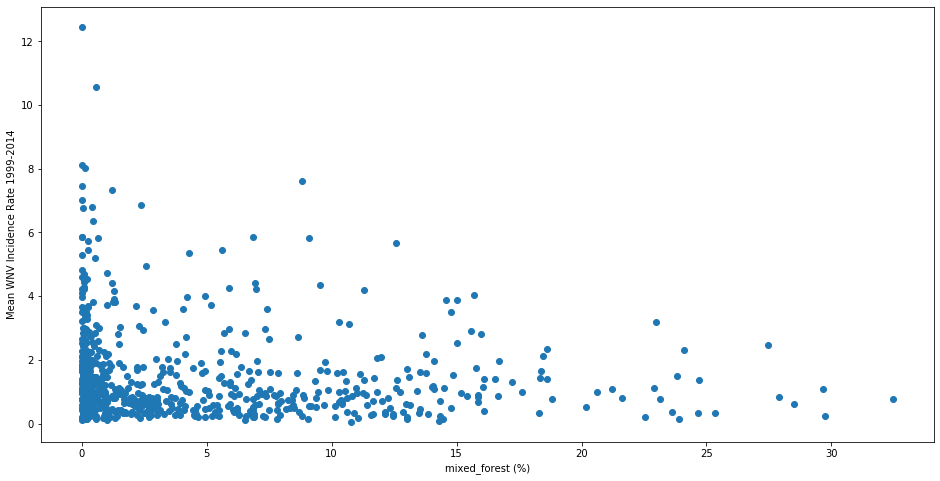

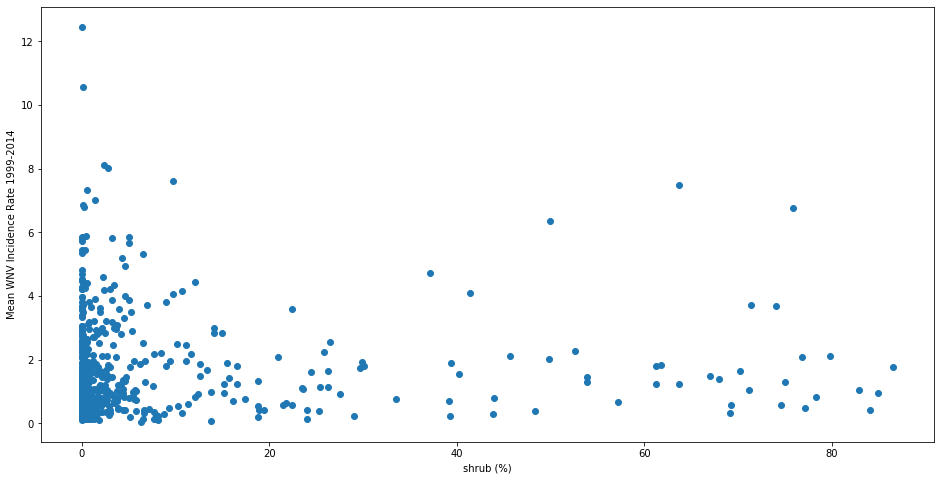

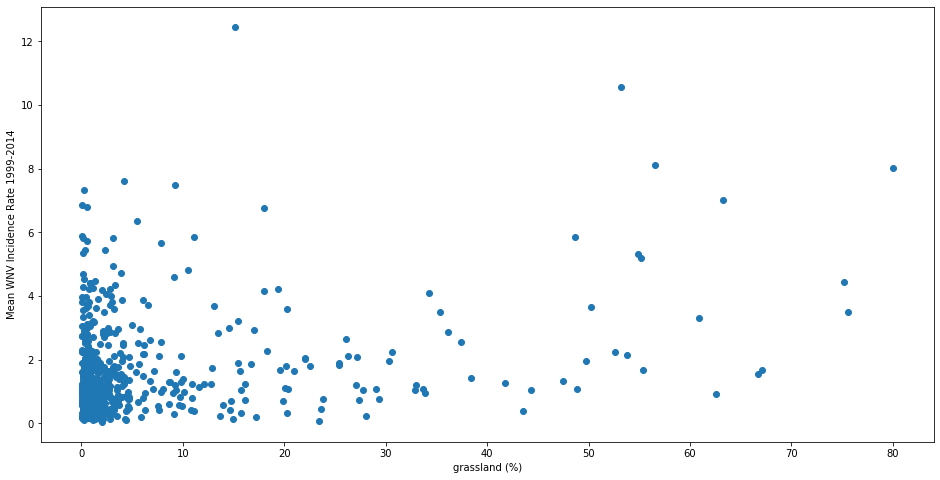

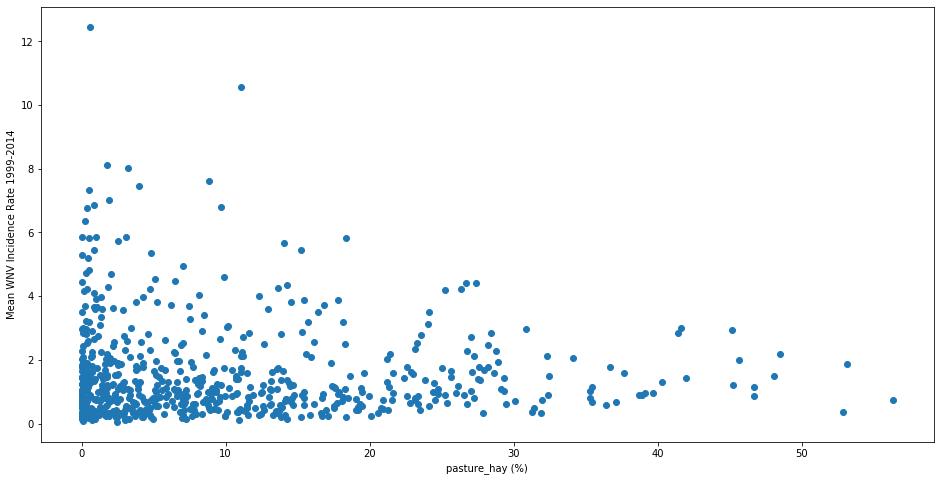

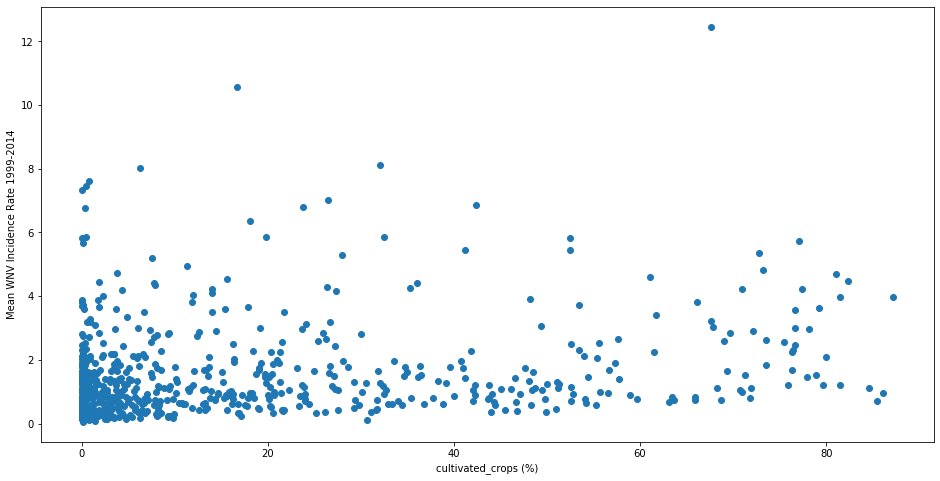

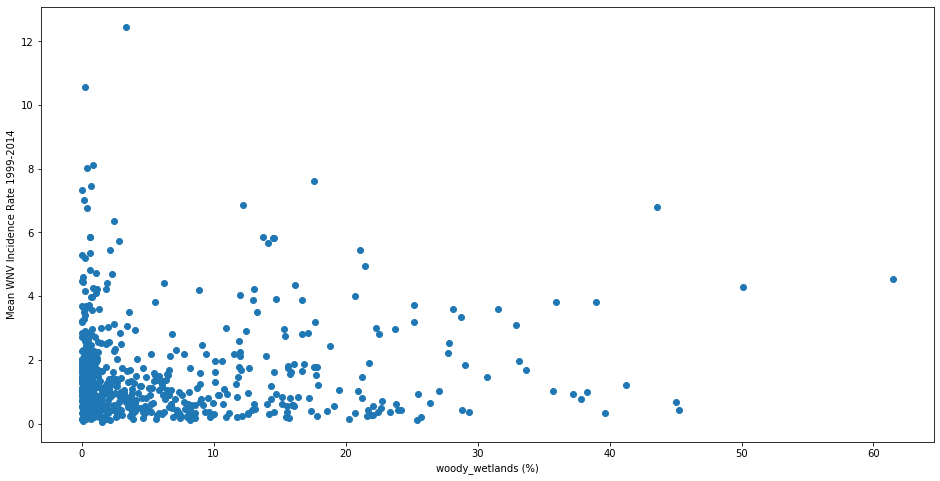

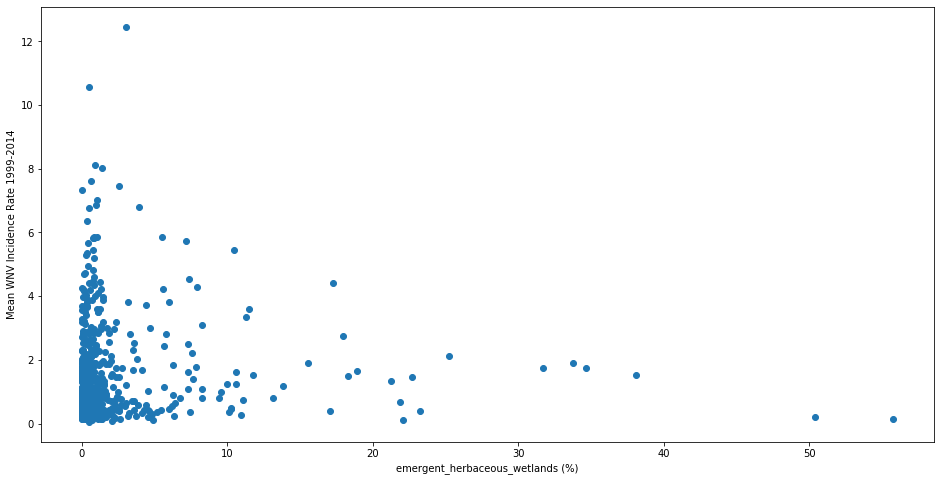

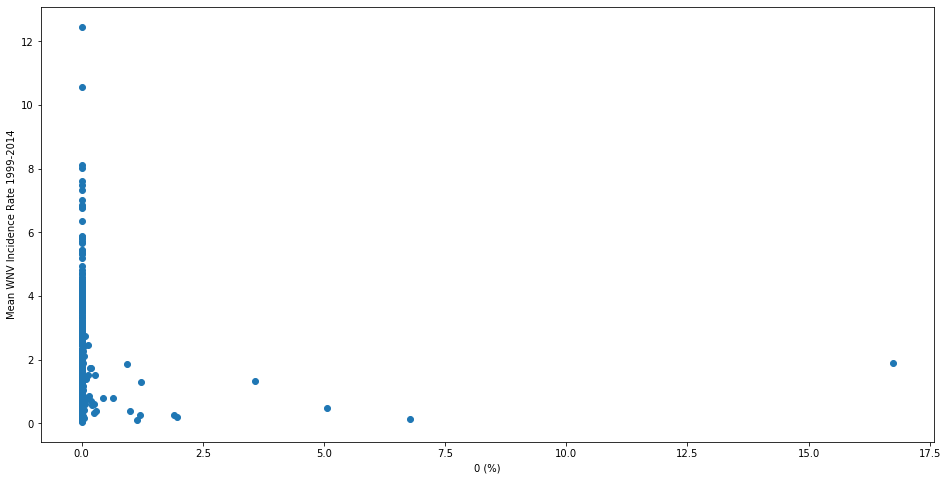

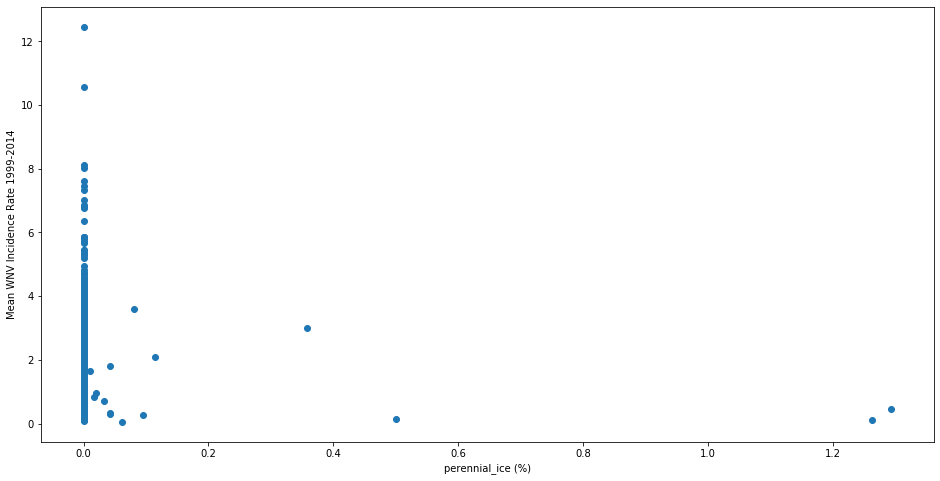

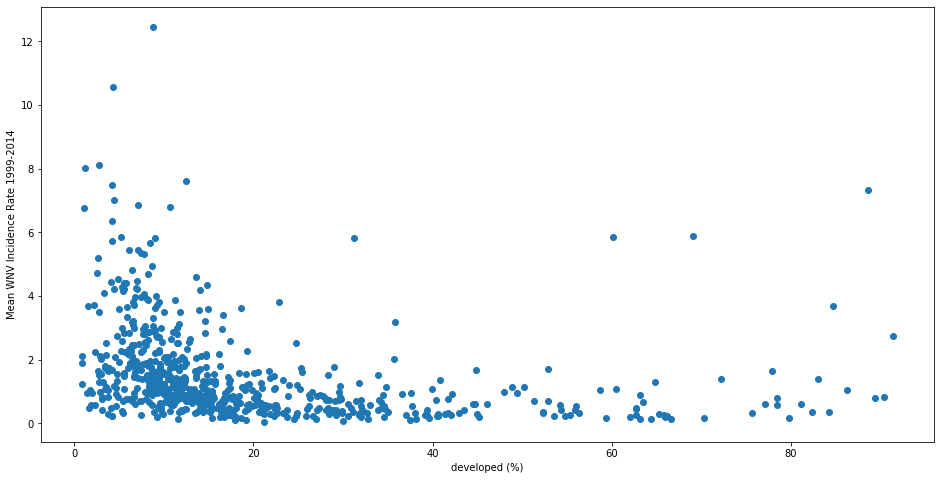

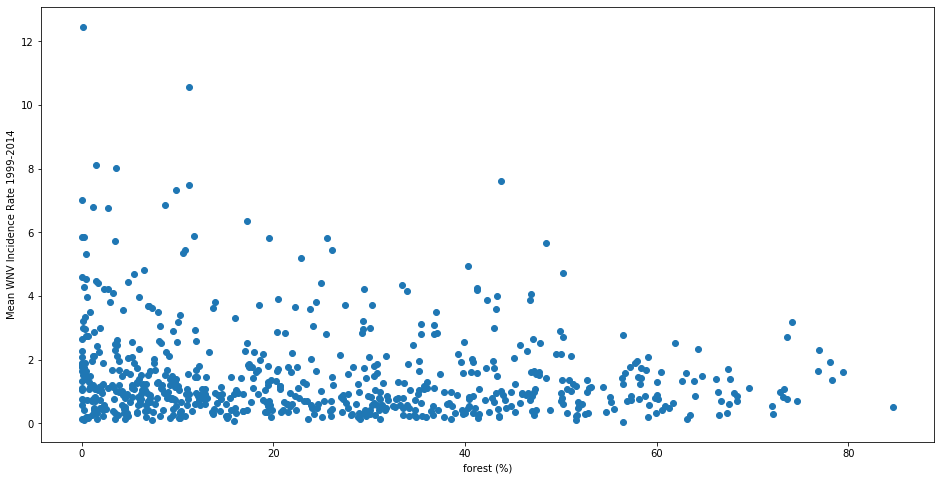

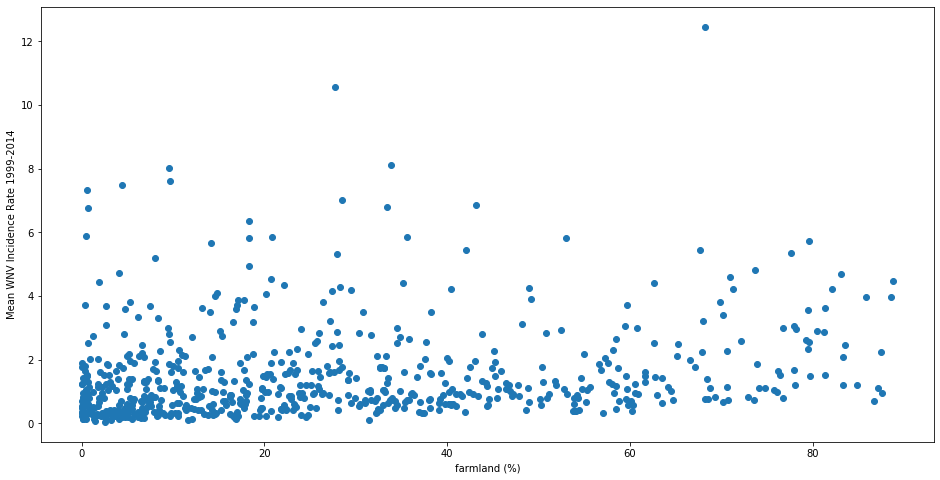

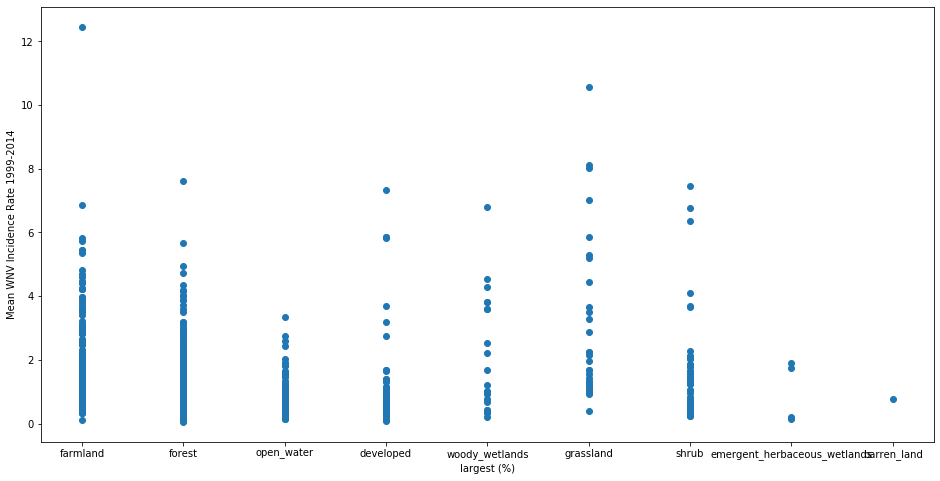

In [152]:
for land_cover_type in nlcd_add.columns:
    plot_land_cover(land_cover_type)